# **Final Project**

# **Import Libraries**

In [ ]:
#library
!pip install bioinfokit
import csv
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.graphics.factorplots import interaction_plot
from bioinfokit.analys import stat
from statsmodels.stats.multicomp import MultiComparison
import plotly
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import ttest_ind
import csv
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.graphics.factorplots import interaction_plot
from bioinfokit.analys import stat
from statsmodels.stats.multicomp import MultiComparison
!pip install pingouin
from pingouin import ancova
from statsmodels.stats.power import TTestIndPower
from statsmodels.stats.power import TTestPower

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.0/87.0 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bioinfokit: filename=bioinfokit-2.1.0-py3-none-any.whl size=58662 sha256=7f37dd3b71f62097d6526029b77e51b84da45dd5f85497a5bb5ae67bab6f795b
  Stored in directory: /root/.cache/pip/wheels/c9/ab/ed/8a7fde0a63653b75ac029d67598265d185e5915dfb594ddc59
Successfully built bioinfokit
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 10.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=5146fb2dfd24a18dd1a0e499e7be08af72d0540a1b157400b88e31aaf1519df0
  Stored in directory: /root/.cache/pip/wheels/04/bb/0d/2d02ec45f29c48d6192476bfb59c5a0e64b605e7212374dd1

# **Research Qestion 1 - Logistic Regression**

In [ ]:
#Logistic Regression#
#Database Clean#
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
data = pd.read_csv('/content/Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv')
data = data[data['StripSearch'] == 1]
data = data.dropna(subset=['Perceived_Race','Sex','Youth_at_arrest__under_18_years',"StripSearch",'SearchReason_CauseInjury','SearchReason_AssistEscape','SearchReason_PossessWeapons','SearchReason_PossessEvidence','ItemsFound'])
data = data[data['Perceived_Race'].isin(['White', 'Black', 'South Asian', 'Indigenous', 'Middle-Eastern', 'Latino', 'East/Southeast Asian'])]
data = data[data['Sex'].isin(['F', 'M'])]
data['Youth_at_arrest__under_18_years'].replace(to_replace=['Youth (aged 17 and younger)', 'Youth (aged 17 years and under)'], value='Youth', inplace=True)
label_encoder = LabelEncoder()
data['Perceived_Race'] = label_encoder.fit_transform(data['Perceived_Race'])
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['Youth_at_arrest__under_18_years'] = label_encoder.fit_transform(data['Youth_at_arrest__under_18_years'])
data['SearchReason_CauseInjury'] = label_encoder.fit_transform(data['SearchReason_CauseInjury'])
data['SearchReason_AssistEscape'] = label_encoder.fit_transform(data['SearchReason_AssistEscape'])
data['SearchReason_PossessWeapons'] = label_encoder.fit_transform(data['SearchReason_PossessWeapons'])
data['SearchReason_PossessEvidence'] = label_encoder.fit_transform(data['SearchReason_PossessEvidence'])
data['ItemsFound'] = label_encoder.fit_transform(data['ItemsFound'])
data=data[['Perceived_Race','Sex','Youth_at_arrest__under_18_years','SearchReason_CauseInjury','SearchReason_AssistEscape','SearchReason_PossessWeapons','SearchReason_PossessEvidence',"ItemsFound"]]
data



,Perceived_Race,Sex,Youth_at_arrest__under_18_years,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound
12,0,1,0,1,1,1,0,0
14,0,1,0,1,1,1,0,0
33,6,1,0,0,0,1,1,0
38,3,1,0,1,0,1,0,0
42,5,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
63915,0,1,0,1,0,0,1,0
64108,6,1,0,0,0,0,0,0
64235,5,1,0,0,0,0,1,0
64347,0,1,1,0,0,1,1,1


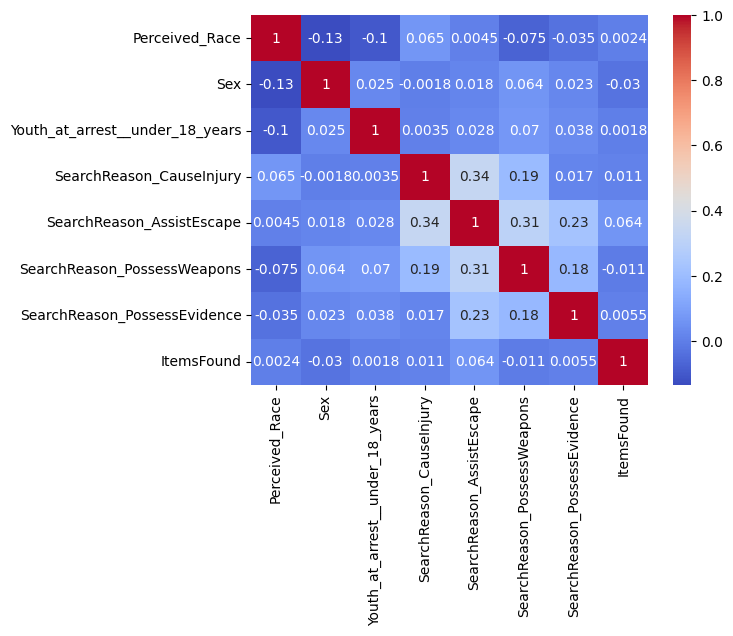

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Compute the correlation matrix
corr_matrix = data.corr()

# Visualize the correlation matrix as a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.show()


In [ ]:
data = data[['Sex','SearchReason_AssistEscape','ItemsFound']]
len(data)

7264

In [ ]:
data['ItemsFound'].value_counts(normalize=True)

0    0.626101
1    0.373899
Name: ItemsFound, dtype: float64

In [ ]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]
#Train Test Split#

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=5)

from imblearn.over_sampling import SMOTE

# Instantiate the SMOTE object
smote = SMOTE(random_state=42)

# Perform oversampling on the training data
x_train, y_train = smote.fit_resample(x_train, y_train)


log_1 = LogisticRegression()
log_1.fit(x_train,y_train)
y_predict = log_1.predict(x_test)
log_1.score(x_test,y_test)
confusion_matrix(y_test,y_predict)

array([[578, 289],
       [356, 230]])

In [ ]:
#building the model with statsmodels
import statsmodels.formula.api as smf

# Create the formula string 
all_columns = ' + '.join(x)
formula = "ItemsFound ~ " + all_columns 
print("Formula: ", formula, "\n")

# Put the training predictors and responses into one DataFrame to be input into the model
trainingdata = pd.concat([x_train,y_train], axis = 1)

Formula:  ItemsFound ~ Sex + SearchReason_AssistEscape 



/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


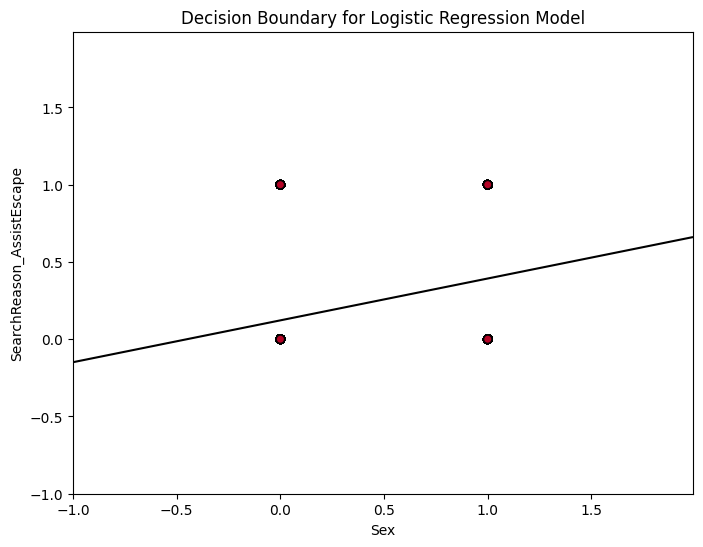

In [ ]:
# Create a meshgrid of points to predict on
h = 0.01
x_min, x_max = x_train.iloc[:, 0].min() - 1, x_train.iloc[:, 0].max() + 1
y_min, y_max = x_train.iloc[:, 1].min() - 1, x_train.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the probabilities of the meshgrid points
Z = log_1.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

# Plot the decision boundary and training points
plt.figure(figsize=(8, 6))
plt.contour(xx, yy, Z, levels=[0.5], cmap="Greys_r")
plt.scatter(x_train.iloc[:, 0], x_train.iloc[:, 1], c=y_train, cmap="coolwarm", edgecolors="k")
plt.xlabel("Sex")
plt.ylabel("SearchReason_AssistEscape")
plt.title("Decision Boundary for Logistic Regression Model")
plt.show()


In [ ]:
reg = smf.logit('ItemsFound ~ Sex + SearchReason_AssistEscape', data=trainingdata).fit()
print(reg.summary())

Optimization terminated successfully.
         Current function value: 0.690581
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:             ItemsFound   No. Observations:                 7362
Model:                          Logit   Df Residuals:                     7359
Method:                           MLE   Df Model:                            2
Date:                Sun, 16 Apr 2023   Pseudo R-squ.:                0.003703
Time:                        12:30:19   Log-Likelihood:                -5084.1
converged:                       True   LL-Null:                       -5102.9
Covariance Type:            nonrobust   LLR p-value:                 6.224e-09
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -0.0360      0.060     -0.597      0.550      -0.

In [ ]:
np.exp(reg.params)

Intercept                    0.964646
Sex                          0.922851
SearchReason_AssistEscape    1.344319
dtype: float64

In [ ]:
params = reg.params
conf = reg.conf_int()
conf['OR'] = params
conf.columns = ["Lower CI", "Upper CI", "OR"]
np.exp(conf)

,Lower CI,Upper CI,OR
Intercept,0.857154,1.085618,0.964646
Sex,0.814834,1.045187,0.922851
SearchReason_AssistEscape,1.221056,1.480024,1.344319


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
# Predict responses 
pred_1 = log_1.predict(x_test)
# round() rounds to nearest integer;
# 0.5 rounds to 0; 0.501 rounds to 1
prediction_1 = list(map(round, pred_1))
print('\nTest accuracy = ', accuracy_score(y_test, prediction_1))


Test accuracy =  0.5560908465244322


In [ ]:
cm = confusion_matrix(y_test, prediction_1) 
print ("\nConfusion Matrix : \n", cm) 


Confusion Matrix : 
 [[578 289]
 [356 230]]


In [ ]:
y_predict = log_1.predict(x_test)
log_1.score(x_test,y_test)

0.5560908465244322

In [ ]:
import statsmodels.api as sm
X = sm.add_constant(x_train)
OLS = sm.OLS(y_train, sm.add_constant(x_train)).fit() 
sm_pred = OLS.get_prediction(sm.add_constant(x_test)).summary_frame(alpha=0.05)
sm_pred.head()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
39825,0.56473,0.016622,0.532146,0.597314,-0.413640,1.543100
42494,0.54476,0.010119,0.524924,0.564596,-0.433268,1.522788
51810,0.56473,0.016622,0.532146,0.597314,-0.413640,1.543100
48818,0.56473,0.016622,0.532146,0.597314,-0.413640,1.543100
625,0.56473,0.016622,0.532146,0.597314,-0.413640,1.543100


In [ ]:
log_1.coef_

array([[-0.07994483,  0.29517106]])

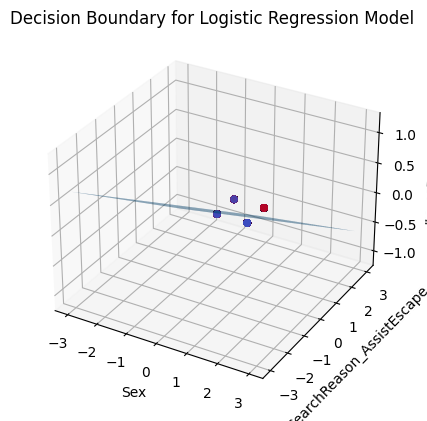

In [ ]:
from mpl_toolkits import mplot3d

# Create a meshgrid of points to plot the decision boundary
xx, yy = np.meshgrid(np.linspace(-3, 3, 50), np.linspace(-3, 3, 50))
zz = -(log_1.intercept_[0] + log_1.coef_[0][0]*xx + log_1.coef_[0][1]*yy) 

# Plot the decision boundary surface
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(xx, yy, zz, alpha=0.5)


# Plot the training points on the same plot
ax.scatter3D(x_train.iloc[:,0], x_train.iloc[:,1], c=y_train, cmap='coolwarm')
ax.set_xlabel('Sex')
ax.set_ylabel('SearchReason_AssistEscape')
ax.set_zlabel('ItemsFound')
ax.set_title('Decision Boundary for Logistic Regression Model')
plt.show()


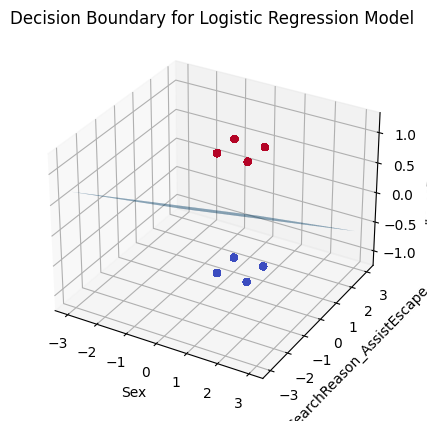

In [ ]:
# Create a new variable Z based on ItemsFound
Z = np.where(y_train == 0, -1, 1)

# Create a meshgrid of points to plot the decision boundary
xx, yy = np.meshgrid(np.linspace(-3, 3, 50), np.linspace(-3, 3, 50))
zz = -(log_1.intercept_[0] + log_1.coef_[0][0]*xx + log_1.coef_[0][1]*yy) 

# Plot the decision boundary surface
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(xx, yy, zz, alpha=0.5)

# Plot the training points on the same plot with different z values based on ItemsFound
ax.scatter3D(x_train.iloc[:,0], x_train.iloc[:,1],Z, c=y_train, cmap='coolwarm')
ax.set_xlabel('Sex')
ax.set_ylabel('SearchReason_AssistEscape')
ax.set_zlabel('ItemsFound')
ax.set_title('Decision Boundary for Logistic Regression Model')
plt.show()


In [ ]:
x_resampled, y_resampled = smote.fit_resample(x, y)
df_resampled = pd.DataFrame(np.column_stack((x_resampled, y_resampled)), columns=list(x.columns) + ['ItemsFound'])

# check the number of instances in each class
df_resampled


,Sex,SearchReason_AssistEscape,ItemsFound
0,1,1,0
1,1,1,0
2,1,0,0
3,1,0,0
4,0,0,0
...,...,...,...
9091,1,0,1
9092,1,0,1
9093,1,0,1
9094,1,0,1


In [ ]:
df_resampled.describe()

,Sex,SearchReason_AssistEscape,ItemsFound
count,9096.000000,9096.000000,9096.000000
mean,0.830805,0.351583,0.500000
std,0.374945,0.477491,0.500027
min,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000
50%,1.000000,0.000000,0.500000
75%,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


In [ ]:
list(df_resampled["Sex"]).count(0)

1539

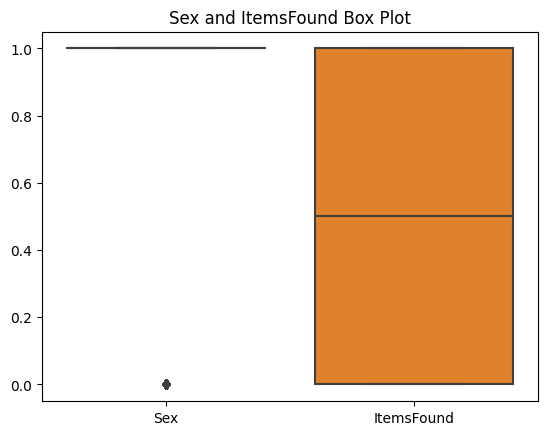

In [ ]:
Sex_ItemsFound_box = sns.boxplot(data= df_resampled[['Sex', 'ItemsFound']]).set_title("Sex and ItemsFound Box Plot")
Sex_ItemsFound_box.figure.savefig("Sex and ItemsFoundk Box Plot.png")


# **Research Question 2 - ANCOVA**

**Data Cleaning for Research Question2**

In [ ]:
data1 = {"Actions_at_arrest___Cooperative":[],"Age_group__at_arrest_":[],"Num_of_Search_Reason":[]}


# Open the CSV file for reading
with open('/content/Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv', newline='') as csvfile:
    # Use the csv module to read the file
    reader = csv.reader(csvfile)
    next(reader)
    
    # Loop through each row in the file
    for row in reader:
      # Do something with the row data
      if(row[10])!= 0:
        try:
          data1["Num_of_Search_Reason"].append(int(row[19])+int(row[20])+int(row[21])+int(row[22]))
          data1["Actions_at_arrest___Cooperative"].append(row[18])
          data1["Age_group__at_arrest_"].append(int(row[7][5:7]))
         
        except:
          pass


#create data
dataframe_1 = pd.DataFrame(data1)
dataframe_1.rename(columns={'Age_group__at_arrest_': 'Age'}, inplace=True)
dataframe_1

,Actions_at_arrest___Cooperative,Age,Num_of_Search_Reason
0,1,25,3
1,0,25,3
2,0,25,1
3,1,35,2
4,1,18,2
...,...,...,...
7796,1,25,2
7797,0,35,0
7798,1,25,1
7799,0,17,2


**EDA For Research Question 2**

In [ ]:
#Show Basic information about the cleaned dataset
dataframe_1.info()
#Describe the data in the cleaned dataset
dataframe_1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7801 entries, 0 to 7800
Data columns (total 3 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Actions_at_arrest___Cooperative  7801 non-null   object
 1   Age                              7801 non-null   int64 
 2   Num_of_Search_Reason             7801 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 183.0+ KB


,Age,Num_of_Search_Reason
count,7801.000000,7801.000000
mean,30.088707,1.981156
std,10.360271,1.209695
min,17.000000,0.000000
25%,25.000000,1.000000
50%,25.000000,2.000000
75%,35.000000,3.000000
max,65.000000,4.000000


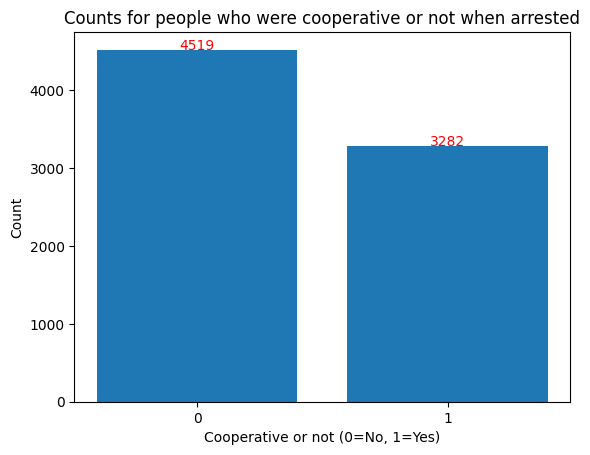

In [ ]:

counts = dataframe_1['Actions_at_arrest___Cooperative'].value_counts()

# Create a bar chart of the counts
plt.bar(counts.index, counts.values)

# Add labels and title
plt.xlabel('Cooperative or not (0=No, 1=Yes)')
plt.ylabel('Count')
plt.title('Counts for people who were cooperative or not when arrested')

# Add text labels to the bars
for i, v in enumerate(counts.values):
    plt.text(i, v, str(v), color='red', ha='center')

# Show the plot
plt.show()





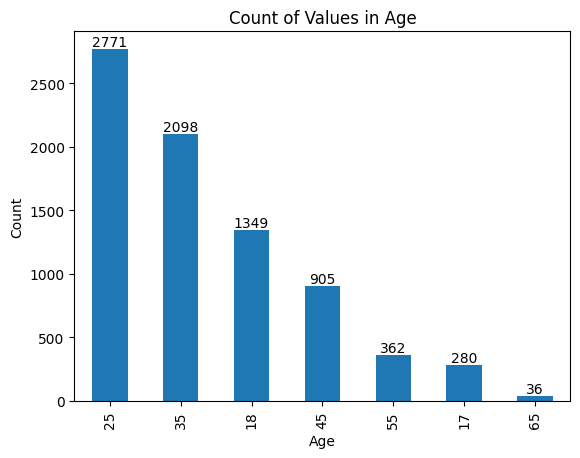

In [ ]:
column_name = 'Age'

# Get the counts of each value in the column
value_counts = dataframe_1[column_name].value_counts()

# Create a bar chart showing the count of each value
ax = value_counts.plot(kind='bar')

# Set the chart title and axis labels
ax.set_title('Count of Values in {}'.format(column_name))
ax.set_xlabel('Age')
ax.set_ylabel('Count')

# Display the exact count of each value on the bar
for i in ax.containers:
    ax.bar_label(i, label_type='edge')

# Display the chart
plt.show()

In [ ]:
arrests_sex_boxplot = px.box(dataframe_1, x="Actions_at_arrest___Cooperative", y="Num_of_Search_Reason"
            
            ,labels={
                    "Actions_at_arrest___Cooperative": "Actions_at_arrest___Cooperative (0=No, 1=Yes)",
                    'Num_of_Search_Reason': "Number of Num_of_Search_Reason",
                             }         
            , height = 800, width = 1100
             , title= "Boxplot: Number of Search Reasons by Whether cooperative or not when arrested"
            )

arrests_sex_boxplot.show()


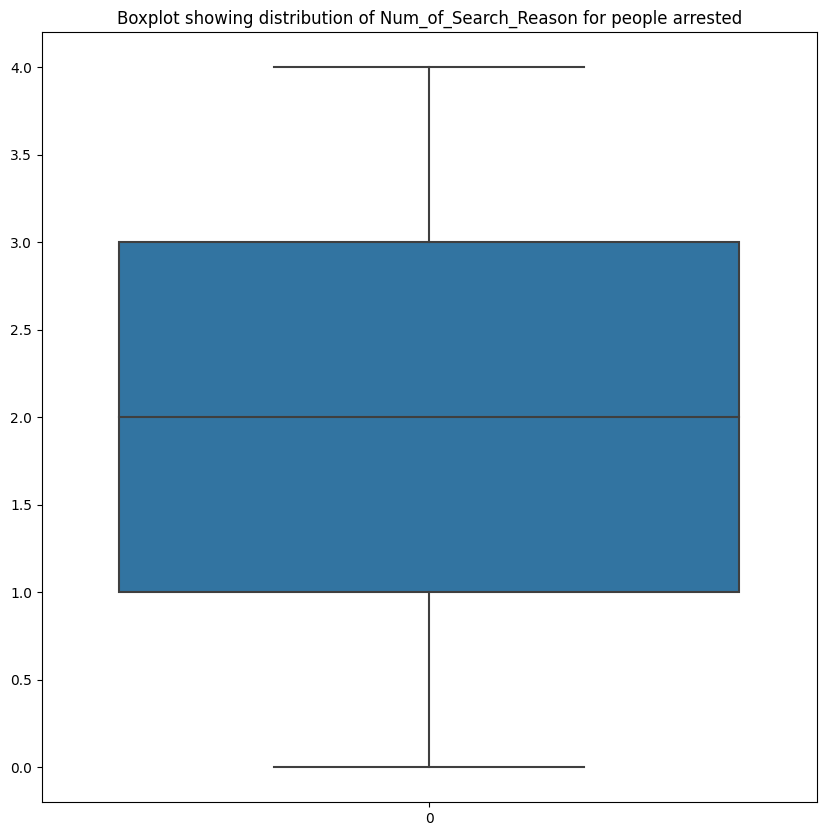

In [ ]:
#Boxplot for Num_of_Search_Reason
plt.figure(figsize= (10,10))
sns.boxplot(data = dataframe_1['Num_of_Search_Reason'])
plt.title('Boxplot showing distribution of Num_of_Search_Reason for people arrested')
plt.xlabel('')
plt.ylabel('')
plt.show()

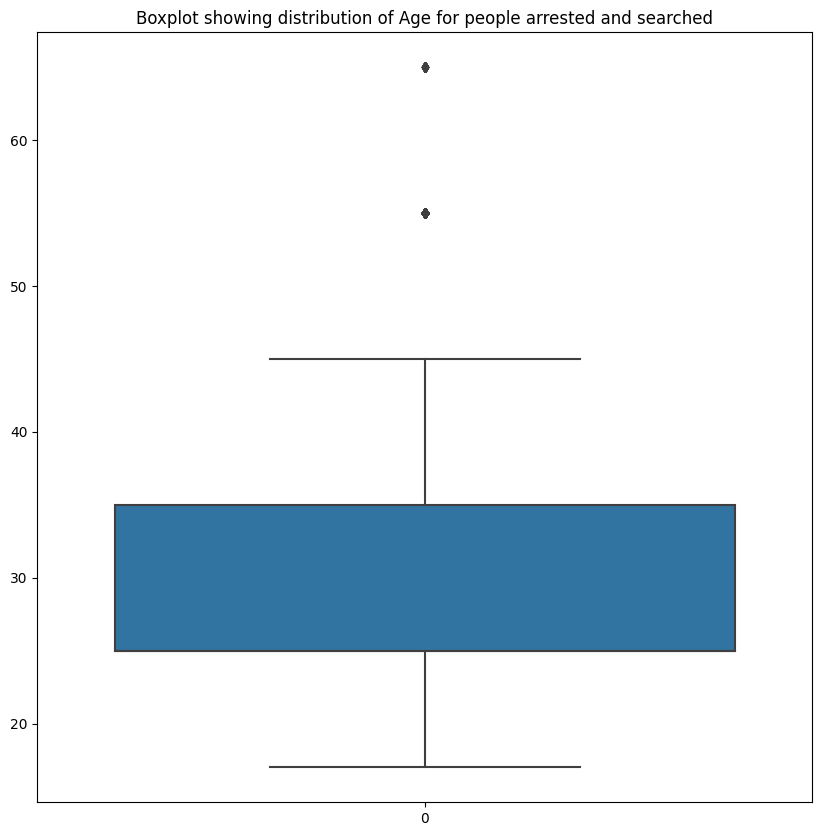

In [ ]:
#Boxplot for Age
plt.figure(figsize= (10,10))
sns.boxplot(data = dataframe_1['Age'])
plt.title('Boxplot showing distribution of Age for people arrested and searched')
plt.xlabel('')
plt.ylabel('')
plt.show()

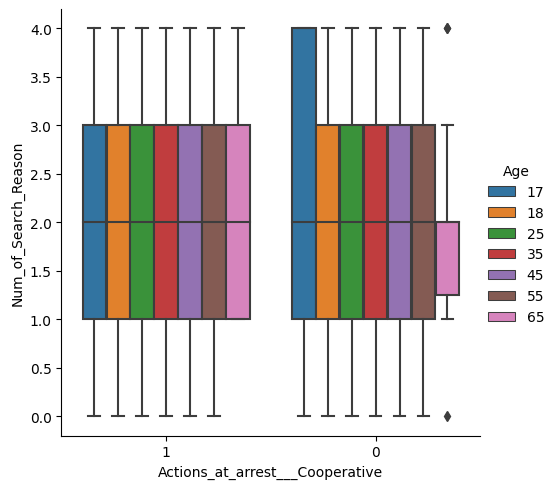

In [ ]:
#Side-by-side boxplots 
sns.catplot(data=dataframe_1, kind="box", x="Actions_at_arrest___Cooperative", y="Num_of_Search_Reason", hue="Age")

**T-Test for Question 2**

In [ ]:
#T test for dataframe_1
def wel_dof(x,y):
  dof = (x.var()/x.size + y.var()/y.size)**2 / ((x.var()/x.size)**2 / (x.size-1) + (y.var()/y.size)**2 / (y.size-1))
  return dof

In [ ]:
#Get the unique values in the column "Actions_at_arrest___Cooperative"
dataframe_1["Actions_at_arrest___Cooperative"].unique()

array(['1', '0'], dtype=object)

In [ ]:
Y = dataframe_1[dataframe_1['Actions_at_arrest___Cooperative']=='1']
N = dataframe_1[dataframe_1['Actions_at_arrest___Cooperative']=='0']

Y_reason = Y['Num_of_Search_Reason']
N_reason = N['Num_of_Search_Reason']
print('Ttest results: ',stats.ttest_ind(Y_reason, N_reason, equal_var=False)) #p value is significant

Ttest results:  Ttest_indResult(statistic=-6.800630621924259, pvalue=1.1246060950304406e-11)


In [ ]:
#Get the means and standard deviations for the two groups
print('Mean for number of search reasons, Yes and No:',Y_reason.mean(), N_reason.mean())
print('Standard deviation for search reasons, Yes and No:',Y_reason.std(), N_reason.std())

Mean for number of search reasons, Yes and No: 1.8729433272394882 2.0597477317990704
Standard deviation for search reasons, Yes and No: 1.1747648045762071 1.228612344894458


In [ ]:
#Get confidence interval for num of search reason
import statsmodels.stats.api as sms
x = sms.CompareMeans(sms.DescrStatsW(N_reason), sms.DescrStatsW(Y_reason))
print('Confidence interval for num of search reason:',x.tconfint_diff(usevar='unequal'))

Confidence interval for num of search reason: (0.13295776773050214, 0.24065104138866236)


# **Power Analysis**

In [ ]:
#code for Cohen's D 

#function to calculate the pooled standard deviation of 2 samples
def pooled_standard_deviation(sample1,sample2):
    #calculate the sample size
    n1, n2 = len(sample1), len(sample2)
    #calculate the variances
    var1, var2 = np.var(sample1, ddof=1), np.var(sample2, ddof=1)
    #calculate the pooled standard deviation
    numerator = ((n1-1) * var1) + ((n2-1) * var2)
    denominator = n1+n2-2
    return np.sqrt(numerator/denominator)

# function to calculate Cohen's d for independent samples
def Cohens_d(sample1, sample2):
    u1, u2 = np.mean(sample1), np.mean(sample2)
    s_pooled = pooled_standard_deviation(sample1, sample2)
    #print(s_pooled)
    return ((u1 - u2) / s_pooled)

In [ ]:
No_coop = dataframe_1[dataframe_1['Actions_at_arrest___Cooperative']=="0"]
Yes_coop = dataframe_1[dataframe_1['Actions_at_arrest___Cooperative']=="1"]

In [ ]:
No_coop.head()

,Actions_at_arrest___Cooperative,Age,Num_of_Search_Reason
1,0,25,3
2,0,25,1
5,0,25,1
7,0,25,4
8,0,35,2


In [ ]:
Yes_coop.head()

,Actions_at_arrest___Cooperative,Age,Num_of_Search_Reason
0,1,25,3
3,1,35,2
4,1,18,2
6,1,25,1
10,1,45,2


In [ ]:
No_search_reason = No_coop['Num_of_Search_Reason']
Yes_search_reason = Yes_coop['Num_of_Search_Reason']

In [ ]:
from statsmodels.stats.power import TTestIndPower
effect_size = Cohens_d(No_search_reason,Yes_search_reason)
alpha = 0.05
power = 0.8
ratio_= len(No_search_reason)/len(Yes_search_reason) #NB: ratio = nobs2/nobs1
print('Effect size (Cohen\'s D) is:',effect_size)

Effect size (Cohen's D) is: 0.15486351058063053


In [ ]:
analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size of nobs1: %.3f' % sample_size, 'needed for No_search_reason') 
print('Actual size of No_search_reason:', len(No_search_reason))
nobs2 =ratio_*sample_size
print('Sample Size of nobs2: %.3f' % nobs2, 'needed for Yes_search_reason')
print('Actual size of Yes_search_reason:', len(Yes_search_reason))  

Sample Size of nobs1: 565.767 needed for No_search_reason
Actual size of No_search_reason: 4519
Sample Size of nobs2: 779.008 needed for Yes_search_reason
Actual size of Yes_search_reason: 3282


In [ ]:
# Check the power 
coop_search_power = TTestPower()
color_n_test = coop_search_power.solve_power(nobs = 4519, effect_size = 0.8, power = None, alpha = 0.05)
print('Power: {:.3f}'.format(color_n_test))

white_n_test = coop_search_power.solve_power(nobs = 3282, effect_size = 0.8, power = None, alpha = 0.05)
print('Power: {:.3f}'.format(white_n_test))

Power: 1.000
Power: 1.000


/usr/local/lib/python3.9/dist-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning:

invalid value encountered in _nct_sf

/usr/local/lib/python3.9/dist-packages/scipy/stats/_continuous_distns.py:6826: RuntimeWarning:

invalid value encountered in _nct_cdf



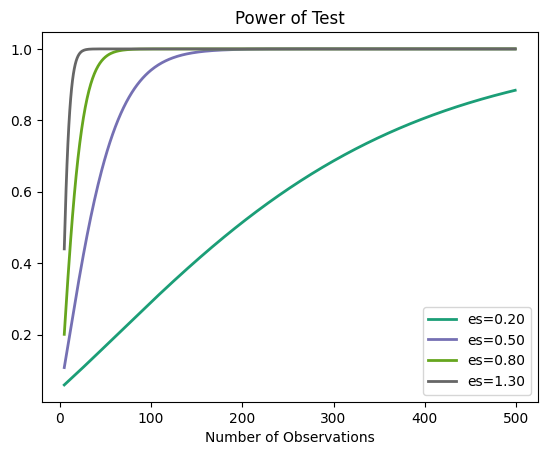

In [ ]:
# import required libraries
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.power import TTestIndPower


# power analysis varying parameters
effect_sizes = np.array([0.2, 0.5, 0.8,1.3])
sample_sizes = np.array(range(5, 500))

# plot power curves
obj = TTestIndPower()
obj.plot_power(dep_var='nobs', nobs=sample_sizes,
			effect_size=effect_sizes)

plt.show()

## **Assumption Check**

Group 1 Shapiro-Wilk test p-value: 0.0000
Group 0 Shapiro-Wilk test p-value: 0.0000


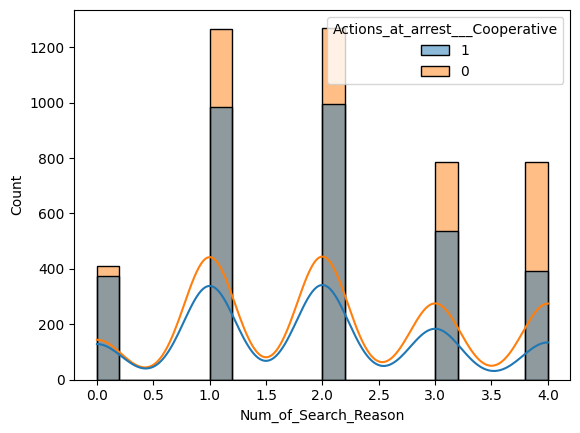

In [ ]:
#Check 1st Assumptioon: normality
import seaborn as sns
from scipy import stats

# Plot histograms for each group
sns.histplot(data=dataframe_1, x='Num_of_Search_Reason', hue='Actions_at_arrest___Cooperative', kde=True)

# Check normality using Shapiro-Wilk test for each group
for group in dataframe_1['Actions_at_arrest___Cooperative'].unique():
    _, pvalue = stats.shapiro(dataframe_1.loc[dataframe_1['Actions_at_arrest___Cooperative'] == group, 'Num_of_Search_Reason'])
    print(f"Group {group} Shapiro-Wilk test p-value: {pvalue:.4f}")


In [ ]:
#Check 3rd Assumption: Homogeneity of Variance
from scipy.stats import levene, bartlett

# Use Levene's test for homogeneity of variance
levene_test = levene(*[dataframe_1.loc[dataframe_1['Actions_at_arrest___Cooperative'] == group, 'Num_of_Search_Reason'] for group in dataframe_1['Actions_at_arrest___Cooperative'].unique()])

print(f"Levene's test p-value: {levene_test.pvalue:.4f}")

# Or, use Bartlett's test if the data is normally distributed
bartlett_test = bartlett(*[dataframe_1.loc[dataframe_1['Actions_at_arrest___Cooperative'] == group, 'Num_of_Search_Reason'] for group in dataframe_1['Actions_at_arrest___Cooperative'].unique()])

print(f"Bartlett's test p-value: {bartlett_test.pvalue:.4f}")


Levene's test p-value: 0.0014
Bartlett's test p-value: 0.0058


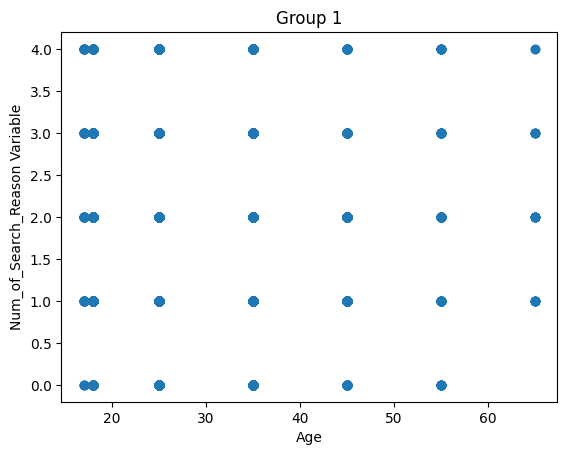

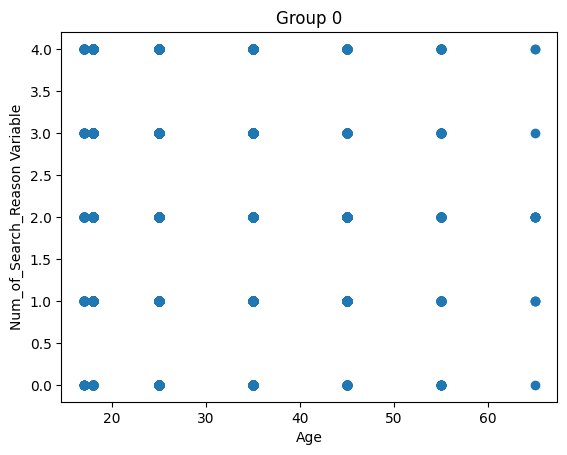

In [ ]:
#Check 4th Assumption: Linearity
import matplotlib.pyplot as plt

# Scatter plot of covariate against dependent variable for each group
for group in dataframe_1['Actions_at_arrest___Cooperative'].unique():
    plt.scatter(dataframe_1.loc[dataframe_1['Actions_at_arrest___Cooperative'] == group, 'Age'], dataframe_1.loc[dataframe_1['Actions_at_arrest___Cooperative'] == group, 'Num_of_Search_Reason'])
    plt.title(f"Group {group}")
    plt.xlabel("Age")
    plt.ylabel("Num_of_Search_Reason Variable")
    plt.show()


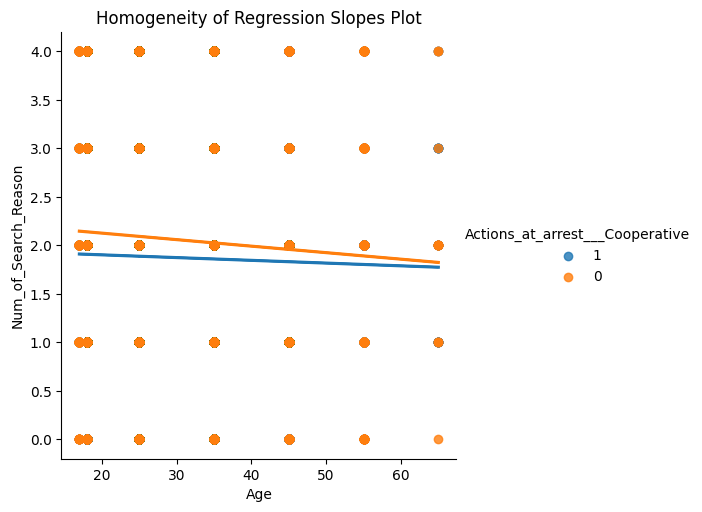

In [ ]:
#Check 5th Assumption: Homogeneity of regression slopes assumption
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit the ANCOVA model
model = ols('Num_of_Search_Reason ~ Age * Actions_at_arrest___Cooperative', data=dataframe_1).fit()

# Extract the residuals and predicted values from the model
residuals = model.resid
predicted = model.predict()

# Plot the residuals against the covariate for each level of the independent variable
sns.lmplot(x='Age', y='Num_of_Search_Reason', hue='Actions_at_arrest___Cooperative', data=dataframe_1, ci=None)
plt.xlabel('Age')
plt.ylabel('Num_of_Search_Reason')
plt.title('Homogeneity of Regression Slopes Plot')

# Add the predicted values to the plot as a line for each group
for group, color in zip(dataframe_1['Actions_at_arrest___Cooperative'].unique(), sns.color_palette()):
    plt.plot(dataframe_1[dataframe_1['Actions_at_arrest___Cooperative'] == group]['Age'], predicted[dataframe_1['Actions_at_arrest___Cooperative'] == group], color=color)

plt.show()



# **ANCOVA**

In [ ]:
ancova(data=dataframe_1, dv='Num_of_Search_Reason', covar='Age', between='Actions_at_arrest___Cooperative')

,Source,SS,DF,F,p-unc,np2
0,Actions_at_arrest___Cooperative,64.745462,1,44.574464,2.616441e-11,0.005684
1,Age,21.106323,1,14.530795,1.389489e-04,0.001860
2,Residual,11326.779157,7798,NaN,NaN,NaN
